In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = diabetes.target
print(x)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [ ]:
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3, 1, 5)

data = []

for i, a in enumerate(alpha):
  ela = ElasticNet(alpha = a, l1_ratio = 0.5, random_state = 45)
  ela.fit(x, y)
  data.append(pd.Series(np.hstack([ela.coef_])))

df_ela = pd.DataFrame(data, index = alpha)
df_ela.columns = x.columns
print(df_ela)

              age         sex         bmi          bp         s1         s2  \
0.001    8.706329 -178.074465  450.884335  281.068431 -44.049705 -77.943898   
0.010   33.147367  -35.245354  211.024367  144.559236  21.931722   0.000000   
0.100   10.286332    0.285983   37.464655   27.544765  11.108856   8.355892   
1.000    0.359018    0.000000    3.259767    2.204340   0.528646   0.250935   
10.000   0.000000    0.000000    0.000000    0.000000   0.000000   0.000000   

                s3          s4          s5         s6  
0.001  -188.957481  119.794399  393.702359  98.944302  
0.010  -115.619973  100.658917  185.325911  96.257335  
0.100   -24.120809   25.505492   35.465700  22.894985  
1.000    -1.861363    2.114454    3.105835   1.769851  
10.000   -0.000000    0.000000    0.000000   0.000000  


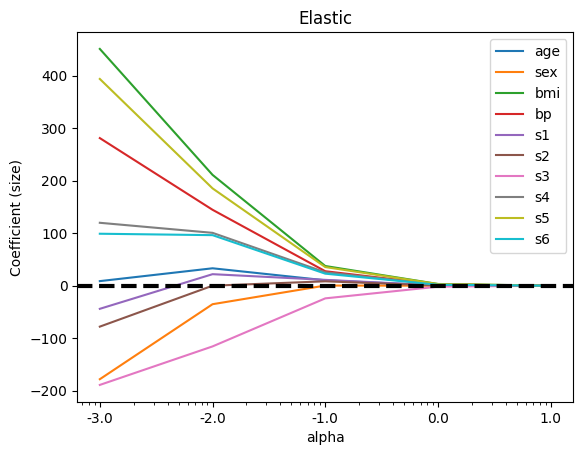

In [ ]:
plt.semilogx(df_ela)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels = df_ela.columns, bbox_to_anchor = (1,1))
plt.title('Elastic')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y = 0, linestyle = '--', color = 'black', linewidth = 3)


In [ ]:
plt.axhline(y = 0, linestyle = '--', linewidth = 2)
plt.plot(df_ela.loc[0.001], '^-', label = 'Elastic alpha = 0.001 ')
plt.plot(df_ela.loc[0.01], 's', label = 'Elastic alpha = 0.01 ')
plt.plot(df_ela.loc[0.1], 'v', label = 'Elastic alpha = 0.1 ')
plt.plot(df_ela.loc[1.00], '*', label = 'Elastic alpha = 1.001 ')
plt.plot(df_ela.loc[10.00], 'o-', label = 'Elastic alpha = 10.00 ')

plt.plot(lr.coef_, label = 'LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor = (1, 1))